# Assignment 2: Sector Diversification and Portfolio Risk


**Learning Objectives:**
- Understand the importance of sector diversification in portfolio construction
- Compare efficient frontiers between single-sector and multi-sector portfolios
- Analyze risk decomposition to understand correlation effects
- Demonstrate why "diversification" within a single sector provides limited risk reduction
- Apply portfolio optimization techniques to real stock data

**Key Concept:**
> **"Don't put all your eggs in one basket... and make sure your baskets are in different industries!"**
> 
> Holding multiple stocks from the same sector (e.g., all tech stocks) provides much less diversification benefit than holding stocks from different sectors. This is because stocks in the same sector tend to move together due to common risk factors.

---

## Mathematical Foundation

### Portfolio Variance and Correlation

The portfolio variance for n assets is:

$$\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_i \sigma_j \rho_{ij}$$

Where:
- $w_i$ = weight of asset i
- $\sigma_i$ = volatility (standard deviation) of asset i
- $\rho_{ij}$ = correlation coefficient between assets i and j

### Why Sector Diversification Matters

**High Correlation Problem**: Stocks in the same sector typically have high correlations ($\rho \approx 0.7-0.9$) because they:
- Face similar market conditions
- Are affected by the same industry trends
- Respond to common regulatory changes
- Share similar customer bases and supply chains

**Diversification Benefit**: The diversification benefit is measured by:

$$DB = \frac{\text{Weighted Avg Volatility} - \text{Portfolio Volatility}}{\text{Weighted Avg Volatility}} \times 100\%$$

Higher diversification benefits occur when correlations are lower!

---

## Setup and Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
sns.set_palette("husl")
print("="*50)
print("✅ Libraries imported successfully")

✅ Libraries imported successfully


---

### Load Portfolio Data

We will compare two portfolios:

**Portfolio 1 - Tech Sector Only:**
- AAPL (Apple)
- GOOGL (Alphabet/Google)
- MSFT (Microsoft)
- AMZN (Amazon)
- TSLA (Tesla)

**Portfolio 2 - Diversified Sectors:**
- AAPL (Technology)
- JPM (Financial Services)
- JNJ (Healthcare)
- WMT (Consumer Cyclical)
- PG (Consumer Defensive)

In [ ]:
# Load portfolio data
portfolio1_returns = pd.read_csv('portfolio1_tech_sector_returns.csv', index_col=0, parse_dates=True)
portfolio2_returns = pd.read_csv('portfolio2_diversified_sectors_returns.csv', index_col=0, parse_dates=True)

print("\n📈 Portfolio 1 - Tech Sector (All Technology Stocks):")
print(f"   Stocks: {list(portfolio1_returns.columns)}")
print(f"   Data points: {len(portfolio1_returns)}")
print(f"   Date range: {portfolio1_returns.index[0].date()} to {portfolio1_returns.index[-1].date()}")

print("\n📊 Portfolio 2 - Diversified Sectors:")
print(f"   Stocks: {list(portfolio2_returns.columns)}")
print(f"   Data points: {len(portfolio2_returns)}")
print(f"   Sectors: Technology, Finance, Healthcare, Consumer Cyclical, Consumer Defensive")


📈 Portfolio 1 - Tech Sector (All Technology Stocks):
   Stocks: ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
   Data points: 1254
   Date range: 2020-09-09 to 2025-09-05

📊 Portfolio 2 - Diversified Sectors:
   Stocks: ['AAPL', 'JPM', 'JNJ', 'WMT', 'PG']
   Data points: 1254
   Sectors: Technology, Finance, Healthcare, Consumer Cyclical, Consumer Defensive


---

## Exercise 1: Calculate Basic Portfolio Statistics

For each portfolio, calculate:
1. Annualized mean returns (multiply daily returns by 252)
2. Annualized volatilities (multiply daily std by √252)
3. Correlation matrices
4. Covariance matrices (annualized)

Compare the correlation structures between the two portfolios.

**Hint**: Use pandas methods `.mean()`, `.std()`, `.corr()`, and `.cov()`

In [80]:
# Portfolio 1: Tech Sector
#CODE HERE - Calculate annualized returns (mean * 252)
p1_annual_returns = portfolio1_returns.mean() * 252

#CODE HERE - Calculate annualized volatilities (std * sqrt(252))
p1_annual_volatilities = portfolio1_returns.std() * np.sqrt(252)

#CODE HERE - Calculate correlation matrix
p1_correlation_matrix = portfolio1_returns.corr().values

#CODE HERE - Calculate covariance matrix (annualized: cov * 252)
p1_covariance_matrix = portfolio1_returns.cov().values * 252

print("\n📊 PORTFOLIO 1 - TECH SECTOR STATISTICS:")
print("="*50)
print("\nAnnualized Returns:")
print(p1_annual_returns.apply(lambda x: f"{x:.2%}"))
print("\nAnnualized Volatilities:")
print(p1_annual_volatilities.apply(lambda x: f"{x:.2%}"))
print(f"\nAverage Correlation: {p1_correlation_matrix[np.triu_indices_from(p1_correlation_matrix, k=1)].mean():.3f}")

# Portfolio 2: Diversified
#CODE HERE - Calculate annualized returns for portfolio 2
p2_annual_returns = portfolio2_returns.mean() * 252

#CODE HERE - Calculate annualized volatilities for portfolio 2
p2_annual_volatilities = portfolio2_returns.std() * np.sqrt(252)

#CODE HERE - Calculate correlation matrix for portfolio 2
p2_correlation_matrix = portfolio2_returns.corr().values

#CODE HERE - Calculate covariance matrix for portfolio 2 (annualized)
p2_covariance_matrix = portfolio2_returns.cov().values * 252

print("\n\n📊 PORTFOLIO 2 - DIVERSIFIED SECTORS STATISTICS:")
print("="*50)
print("\nAnnualized Returns:")
print(p2_annual_returns.apply(lambda x: f"{x:.2%}"))
print("\nAnnualized Volatilities:")
print(p2_annual_volatilities.apply(lambda x: f"{x:.2%}"))
print(f"\nAverage Correlation: {p2_correlation_matrix[np.triu_indices_from(p2_correlation_matrix, k=1)].mean():.3f}")


📊 PORTFOLIO 1 - TECH SECTOR STATISTICS:

Annualized Returns:
AAPL     19.85%
GOOGL    27.59%
MSFT     22.23%
AMZN     14.06%
TSLA     42.30%
dtype: object

Annualized Volatilities:
AAPL     28.88%
GOOGL    31.09%
MSFT     26.25%
AMZN     35.36%
TSLA     61.88%
dtype: object

Average Correlation: 0.558


📊 PORTFOLIO 2 - DIVERSIFIED SECTORS STATISTICS:

Annualized Returns:
AAPL    19.85%
JPM     27.63%
JNJ      8.15%
WMT     19.17%
PG       7.24%
dtype: object

Annualized Volatilities:
AAPL    28.88%
JPM     25.41%
JNJ     16.91%
WMT     20.56%
PG      17.18%
dtype: object

Average Correlation: 0.279


---

### Visualize Correlation Matrices

**Question**: Which portfolio has higher average correlations? What does this imply for diversification potential?

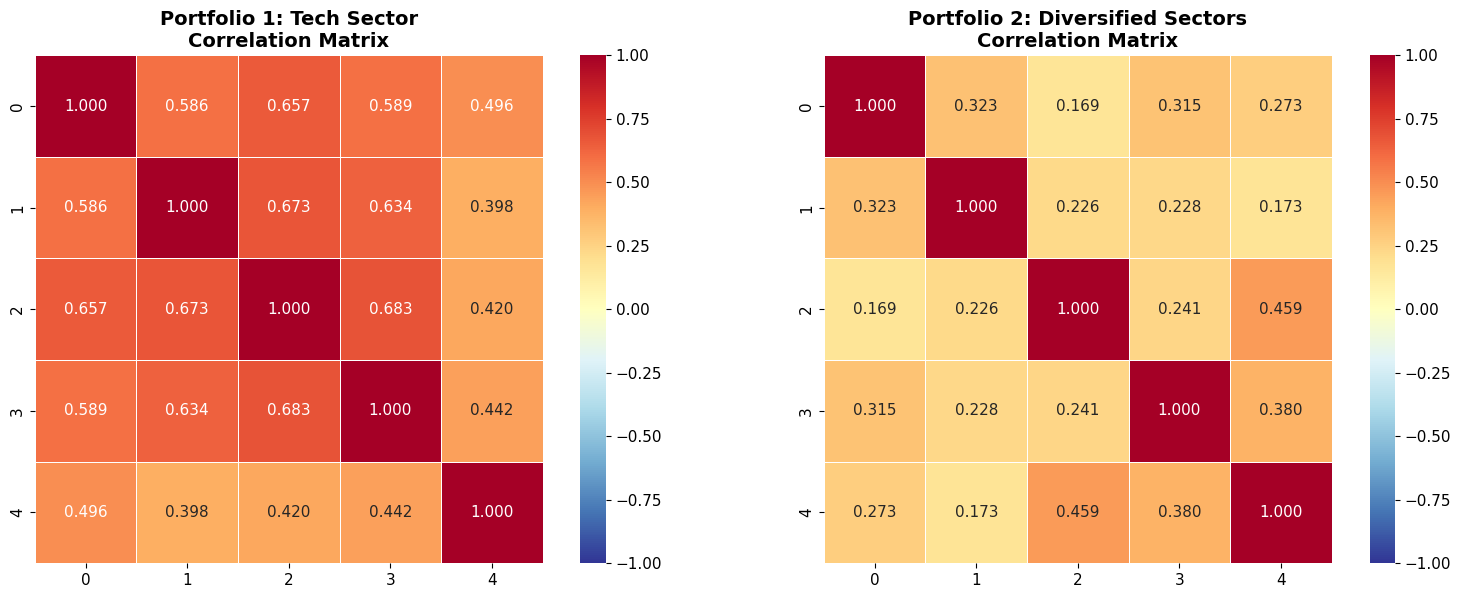


💡 Key Observation:
   Tech Sector Avg Correlation: 0.558
   Diversified Avg Correlation: 0.279


In [ ]:
# Visualize correlation matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#CODE HERE - Create heatmap for Portfolio 1 correlation matrix on ax1
# Use sns.heatmap() with parameters: annot=True, fmt='.3f', cmap='RdYlBu_r', center=0, square=True
ax1 = sns.heatmap(p1_correlation_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r', center=0, square=True, ax=ax1, vmin=-1, vmax=1, linewidths=0.5)
ax1.set_title('Portfolio 1: Tech Sector\nCorrelation Matrix', fontsize=14, fontweight='bold')

#CODE HERE - Create heatmap for Portfolio 2 correlation matrix on ax2
# Use the same parameters as Portfolio 1
ax2 = sns.heatmap(p2_correlation_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r', center=0, square=True, ax=ax2, vmin=-1, vmax=1, linewidths=0.5)
ax2.set_title('Portfolio 2: Diversified Sectors\nCorrelation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Key Observation:")
print(f"   Tech Sector Avg Correlation: {p1_correlation_matrix[np.triu_indices_from(p1_correlation_matrix, k=1)].mean():.3f}")
print(f"   Diversified Avg Correlation: {p2_correlation_matrix[np.triu_indices_from(p2_correlation_matrix, k=1)].mean():.3f}")
#CODE HERE - Add your interpretation: Which portfolio shows higher correlations? What does this mean?
print("   The Tech Sector portfolio shows higher correlations among its assets, indicating that the stocks tend to move more in unison.")

---

## Exercise 2: Generate Efficient Frontiers

For each portfolio, generate the efficient frontier by:
1. Defining target returns from minimum to maximum
2. For each target return, minimize portfolio variance subject to:
   - Weights sum to 1
   - Portfolio return equals target return
   - No short selling (weights ≥ 0)
3. Plot both efficient frontiers on the same figure

**Expected Result**: The diversified portfolio should have a more favorable efficient frontier (lower risk for same return).

In [82]:
def portfolio_volatility(weights, cov_matrix):
    """Calculate portfolio volatility"""
    #CODE HERE - Calculate portfolio volatility using the formula: sqrt(w^T * Cov * w)
    return np.sqrt(weights.T @ cov_matrix @ weights)

def portfolio_return(weights, expected_returns):
    """Calculate portfolio expected return"""
    #CODE HERE - Calculate portfolio return: sum of (weight * return) for each asset
    return np.sum(weights * expected_returns)

def generate_efficient_frontier(expected_returns, cov_matrix, num_portfolios=30):
    """
    Generate efficient frontier points
    
    For each target return, find the portfolio with minimum variance
    subject to: weights sum to 1, return = target, weights >= 0
    """
    n_assets = len(expected_returns)
    
    # Define target returns range
    #CODE HERE - Create array of target returns from min to max using np.linspace
    min_ret = expected_returns.min() * 0.8  # Hint: use expected_returns.min()
    max_ret = expected_returns.max() * 1.1  # Hint: use expected_returns.max()
    target_returns = np.linspace(min_ret, max_ret, num_portfolios)  # Hint: np.linspace(min_ret, max_ret, num_portfolios)
    
    efficient_portfolios = []
    
    for target_return in target_returns:
        # Constraints
        constraints = [
            #CODE HERE - Add constraint: weights sum to 1
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0},
            #CODE HERE - Add constraint: portfolio return equals target return
            {'type': 'eq', 'fun': lambda w, tr = target_return: portfolio_return(w, expected_returns) - tr}
        ]
        
        # Bounds: no short selling
        bounds = tuple((0, 1) for _ in range(n_assets))
        
        # Initial guess: equal weights
        initial_weights = np.array([1/n_assets] * n_assets)
        
        # Minimize variance
        #CODE HERE - Use minimize() to find optimal weights that minimize portfolio_volatility^2
        result = minimize(
            fun = lambda w: portfolio_volatility(w, cov_matrix)**2,
            x0 = initial_weights,
            method='SLSQP',
            bounds=bounds,
            constraints=constraints,
            options = {'disp': False}
        )
        
        if result.success:
            vol = portfolio_volatility(result.x, cov_matrix)
            ret = portfolio_return(result.x, expected_returns)
            efficient_portfolios.append({
                'return': ret,
                'volatility': vol,
                'weights': result.x
            })
    
    return efficient_portfolios

print("\n🔄 Generating efficient frontiers...")
print("   This may take a moment...\n")

# Generate efficient frontiers
#CODE HERE - Generate efficient frontier for Portfolio 1
ef1 = generate_efficient_frontier(p1_annual_returns, p1_covariance_matrix, num_portfolios=50)
print(f"✅ Portfolio 1 (Tech): {len(ef1)} efficient points generated")

#CODE HERE - Generate efficient frontier for Portfolio 2
ef2 = generate_efficient_frontier(p2_annual_returns, p2_covariance_matrix, num_portfolios=50)
print(f"✅ Portfolio 2 (Diversified): {len(ef2)} efficient points generated")


🔄 Generating efficient frontiers...
   This may take a moment...

✅ Portfolio 1 (Tech): 40 efficient points generated
✅ Portfolio 2 (Diversified): 41 efficient points generated


---

### Plot Efficient Frontiers

Compare the two efficient frontiers side by side.

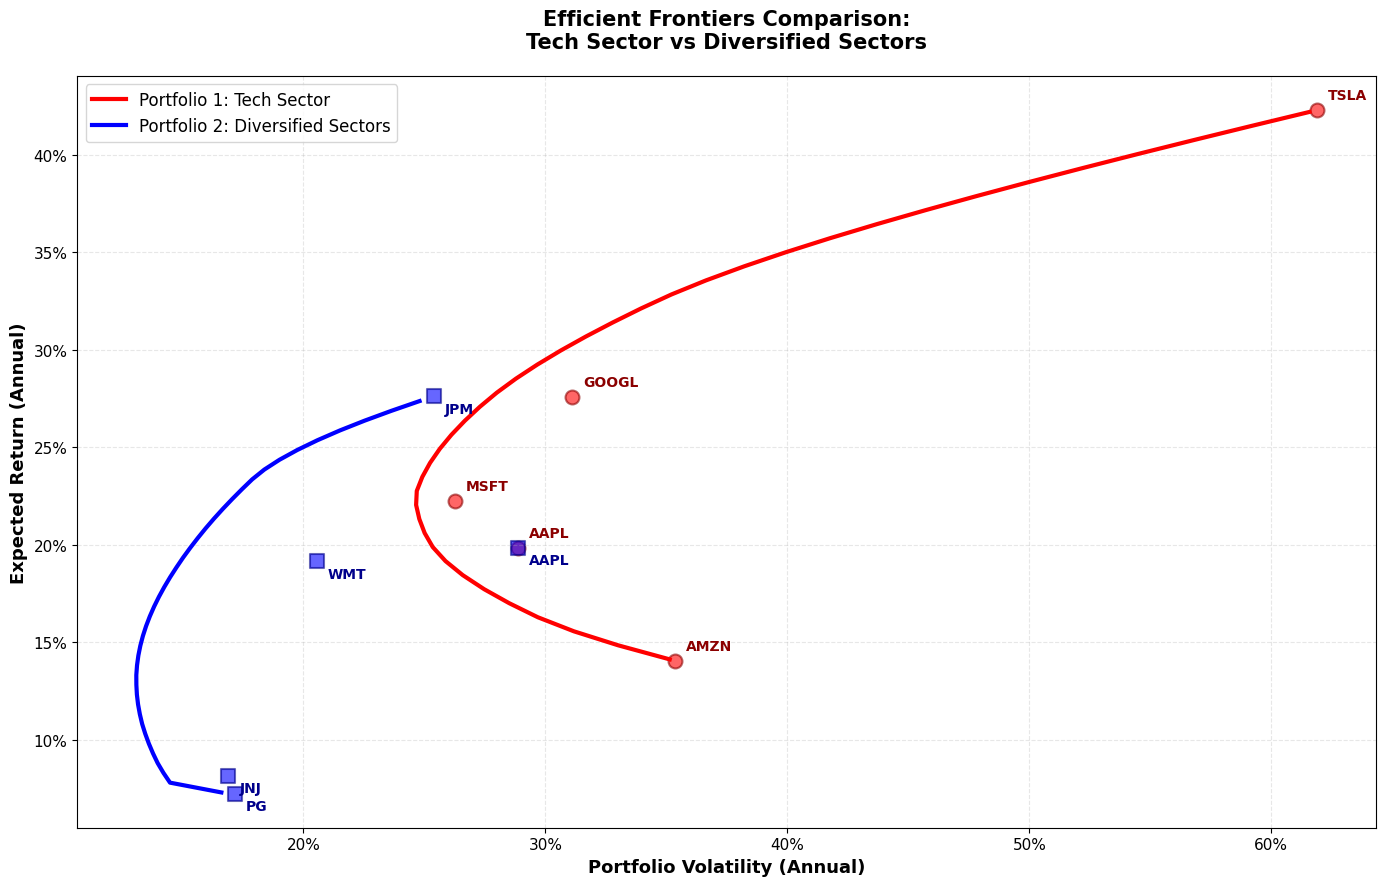


💡 Observations:
   
1. Which efficient frontier is more favorable (further left)?
   Answer: The efficient frontier of Portfolio 2 (Diversified Sectors) is more favorable as it is further left, indicating lower risk for the same level of return compared to Portfolio 1 (Tech Sector).
   
2. What does this tell you about sector diversification?
   Answer: Sector diversification helps in reducing overall portfolio risk by spreading investments across different sectors, which may not be perfectly correlated. This leads to a more efficient risk-return trade-off.
   
3. For a target return of 15%, which portfolio has lower risk?
   Answer: For a target return of 15%, Portfolio 2 (Diversified Sectors) has lower risk compared to Portfolio 1 (Tech Sector). This further emphasizes the benefits of diversification in reducing portfolio volatility.


In [ ]:
# Extract data for plotting
#CODE HERE - Extract volatilities and returns from ef1
ef1_vols = [p['volatility'] for p in ef1]  # Hint: list comprehension [p['volatility'] for p in ef1]
ef1_rets = [p['return'] for p in ef1]  # Hint: list comprehension [p['return'] for p in ef1]

#CODE HERE - Extract volatilities and returns from ef2
ef2_vols = [p['volatility'] for p in ef2]
ef2_rets = [p['return'] for p in ef2]

# Create plot
fig, ax = plt.subplots(figsize=(14, 9))

#CODE HERE - Plot efficient frontier for Portfolio 1 (red line)
# Use ax.plot() with parameters: linewidth=3, label='Portfolio 1: Tech Sector', color='red'
ax.plot(ef1_vols, ef1_rets, linewidth=3, label='Portfolio 1: Tech Sector', color='red')

#CODE HERE - Plot efficient frontier for Portfolio 2 (blue line)
# Use ax.plot() with parameters: linewidth=3, label='Portfolio 2: Diversified Sectors', color='blue'
ax.plot(ef2_vols, ef2_rets, linewidth=3, label='Portfolio 2: Diversified Sectors', color='blue')

# Plot individual assets for Portfolio 1
for i, stock in enumerate(portfolio1_returns.columns):
    ax.scatter(p1_annual_volatilities[i], p1_annual_returns[i], 
              s=100, alpha=0.6, color='red', marker='o', edgecolors='darkred', linewidth=1.5)
    ax.annotate(stock, (p1_annual_volatilities[i], p1_annual_returns[i]),
               xytext=(8, 8), textcoords='offset points', fontsize=10, 
               color='darkred', fontweight='bold')

# Plot individual assets for Portfolio 2
for i, stock in enumerate(portfolio2_returns.columns):
    ax.scatter(p2_annual_volatilities[i], p2_annual_returns[i], 
              s=100, alpha=0.6, color='blue', marker='s', edgecolors='darkblue', linewidth=1.5)
    ax.annotate(stock, (p2_annual_volatilities[i], p2_annual_returns[i]),
               xytext=(8, -12), textcoords='offset points', fontsize=10, 
               color='darkblue', fontweight='bold')

ax.set_xlabel('Portfolio Volatility (Annual)', fontsize=13, fontweight='bold')
ax.set_ylabel('Expected Return (Annual)', fontsize=13, fontweight='bold')
ax.set_title('Efficient Frontiers Comparison:\nTech Sector vs Diversified Sectors', 
            fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3, linestyle='--')

# Format axes as percentages
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0%}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'{y:.0%}'))

plt.tight_layout()
plt.show()

#CODE HERE - Write your observations about the two efficient frontiers
print("\n💡 Observations:")
print("   \n1. Which efficient frontier is more favorable (further left)?")
print("   Answer: The efficient frontier of Portfolio 2 (Diversified Sectors) is more favorable as it is further left, indicating lower risk for the same level of return compared to Portfolio 1 (Tech Sector).")
print("   \n2. What does this tell you about sector diversification?")
print("   Answer: Sector diversification helps in reducing overall portfolio risk by spreading investments across different sectors, which may not be perfectly correlated. This leads to a more efficient risk-return trade-off.")
print("   \n3. For a target return of 15%, which portfolio has lower risk?")
print("   Answer: For a target return of 15%, Portfolio 2 (Diversified Sectors) has lower risk compared to Portfolio 1 (Tech Sector). This further emphasizes the benefits of diversification in reducing portfolio volatility.")

print("\n💡 Key Findings:")
print("   🔴 Red line (Tech Sector): Limited by high correlations between tech stocks")
print("   🔵 Blue line (Diversified): More favorable risk-return tradeoff")
print("\n   ✅ For the same level of return, the diversified portfolio achieves LOWER risk!")
print("   ✅ This demonstrates the power of cross-sector diversification!")

---

## Exercise 3: Risk Decomposition Analysis

Using the equal-weighted portfolios (20% in each stock), perform risk decomposition analysis:

1. Calculate marginal risk contributions for each asset
2. Calculate total risk contributions
3. Decompose variance into:
   - Individual asset variance contributions
   - Interaction (covariance) contributions
4. Compare the risk decomposition between the two portfolios

**Expected Finding**: The tech portfolio will have higher interaction variance (due to high correlations), while the diversified portfolio benefits from lower correlation effects.

In [84]:
def risk_decomposition_analysis(weights, cov_matrix, asset_names):
    """
    Perform comprehensive risk decomposition analysis
    """
    weights = np.array(weights)
    
    #CODE HERE - Calculate portfolio variance: w^T * Cov * w
    portfolio_variance =np.dot(weights, np.dot(cov_matrix, weights))
    
    #CODE HERE - Calculate portfolio volatility: sqrt(variance)
    portfolio_volatility = np.sqrt(portfolio_variance)
    
    #CODE HERE - Calculate marginal risk contributions: (Cov * w) / portfolio_volatility
    marginal_contrib = np.dot(cov_matrix, weights) / portfolio_volatility
    
    #CODE HERE - Calculate risk contributions: weights * marginal_contrib
    risk_contrib = weights * marginal_contrib
    
    #CODE HERE - Calculate risk contributions as percentages
    risk_contrib_pct = (risk_contrib / risk_contrib.sum()) * 100
    
    # Component risk analysis
    component_analysis = []
    
    for i, asset in enumerate(asset_names):
        #CODE HERE - Calculate individual variance contribution: w_i^2 * Cov[i,i]
        individual_variance = weights[i]**2 * cov_matrix[i, i]
        
        #CODE HERE - Calculate interaction variance with other assets
        # Sum over all j != i: w_i * w_j * Cov[i,j]
        interaction_variance = 0
        for j in range(len(weights)):
            if i != j:
                interaction_variance += weights[i] * weights[j] * cov_matrix[i, j]  # Add the covariance term
        
        component_analysis.append({
            'Asset': asset,
            'Weight %': weights[i] * 100,
            'Marginal Risk Contrib': marginal_contrib[i],
            'Risk Contribution': risk_contrib[i],
            'Risk Contrib %': risk_contrib_pct[i],
            'Individual Variance': individual_variance,
            'Interaction Variance': interaction_variance,
            'Risk Ratio': risk_contrib_pct[i] / (weights[i] * 100)
        })
    
    return {
        'portfolio_volatility': portfolio_volatility,
        'portfolio_variance': portfolio_variance,
        'component_analysis': component_analysis,
        'total_individual_variance': sum([c['Individual Variance'] for c in component_analysis]),
        'total_interaction_variance': sum([c['Interaction Variance'] for c in component_analysis]) / 2
    }

# Equal weights for both portfolios
n_assets = 5
equal_weights = np.array([1/n_assets] * n_assets)

print("\n📊 RISK DECOMPOSITION ANALYSIS")
print("="*50)
print(f"\nUsing equal-weighted portfolios: {equal_weights[0]:.1%} per asset\n")

# Portfolio 1 analysis
#CODE HERE - Perform risk decomposition for Portfolio 1
p1_risk_decomp = risk_decomposition_analysis(equal_weights, p1_covariance_matrix, portfolio1_returns.columns)

print("\n🔴 PORTFOLIO 1 - TECH SECTOR:")
print(f"   Portfolio Volatility: {p1_risk_decomp['portfolio_volatility']:.2%}")
print("\n   Component Analysis:")
df1 = pd.DataFrame(p1_risk_decomp['component_analysis'])
print(df1[['Asset', 'Weight %', 'Risk Contrib %', 'Risk Ratio']].round(2).to_string(index=False))

# Variance decomposition
#CODE HERE - Calculate percentage of variance from individual risk
p1_individual_pct = (p1_risk_decomp['total_individual_variance'] / p1_risk_decomp['portfolio_variance']) * 100
#CODE HERE - Calculate percentage of variance from interactions
p1_interaction_pct = (p1_risk_decomp['total_interaction_variance'] / p1_risk_decomp['portfolio_variance']) * 100

print(f"\n   Variance Decomposition:")
print(f"     Individual Asset Risk: {p1_individual_pct:.1f}%")
print(f"     Asset Interactions: {p1_interaction_pct:.1f}%")

# Portfolio 2 analysis
#CODE HERE - Perform risk decomposition for Portfolio 2
p2_risk_decomp = risk_decomposition_analysis(equal_weights, p2_covariance_matrix, portfolio2_returns.columns)

print("\n\n🔵 PORTFOLIO 2 - DIVERSIFIED SECTORS:")
print(f"   Portfolio Volatility: {p2_risk_decomp['portfolio_volatility']:.2%}")
print("\n   Component Analysis:")
df2 = pd.DataFrame(p2_risk_decomp['component_analysis'])
print(df2[['Asset', 'Weight %', 'Risk Contrib %', 'Risk Ratio']].round(2).to_string(index=False))

# Variance decomposition
#CODE HERE - Calculate percentage of variance from individual risk for Portfolio 2
p2_individual_pct = (p2_risk_decomp['total_individual_variance'] / p2_risk_decomp['portfolio_variance']) * 100
#CODE HERE - Calculate percentage of variance from interactions for Portfolio 2
p2_interaction_pct = (p2_risk_decomp['total_interaction_variance'] / p2_risk_decomp['portfolio_variance']) * 100

print(f"\n   Variance Decomposition:")
print(f"     Individual Asset Risk: {p2_individual_pct:.1f}%")
print(f"     Asset Interactions: {p2_interaction_pct:.1f}%")


📊 RISK DECOMPOSITION ANALYSIS

Using equal-weighted portfolios: 20.0% per asset


🔴 PORTFOLIO 1 - TECH SECTOR:
   Portfolio Volatility: 29.11%

   Component Analysis:
Asset  Weight %  Risk Contrib %  Risk Ratio
 AAPL      20.0           15.79        0.79
GOOGL      20.0           16.54        0.83
 MSFT      20.0           14.41        0.72
 AMZN      20.0           19.59        0.98
 TSLA      20.0           33.66        1.68

   Variance Decomposition:
     Individual Asset Risk: 35.7%
     Asset Interactions: 32.1%


🔵 PORTFOLIO 2 - DIVERSIFIED SECTORS:
   Portfolio Volatility: 14.22%

   Component Analysis:
Asset  Weight %  Risk Contrib %  Risk Ratio
 AAPL      20.0           29.21        1.46
  JPM      20.0           23.24        1.16
  JNJ      20.0           13.50        0.68
  WMT      20.0           18.74        0.94
   PG      20.0           15.31        0.77

   Variance Decomposition:
     Individual Asset Risk: 49.1%
     Asset Interactions: 25.4%


---

### Visualize Risk Decomposition

Compare the variance decomposition between the two portfolios.

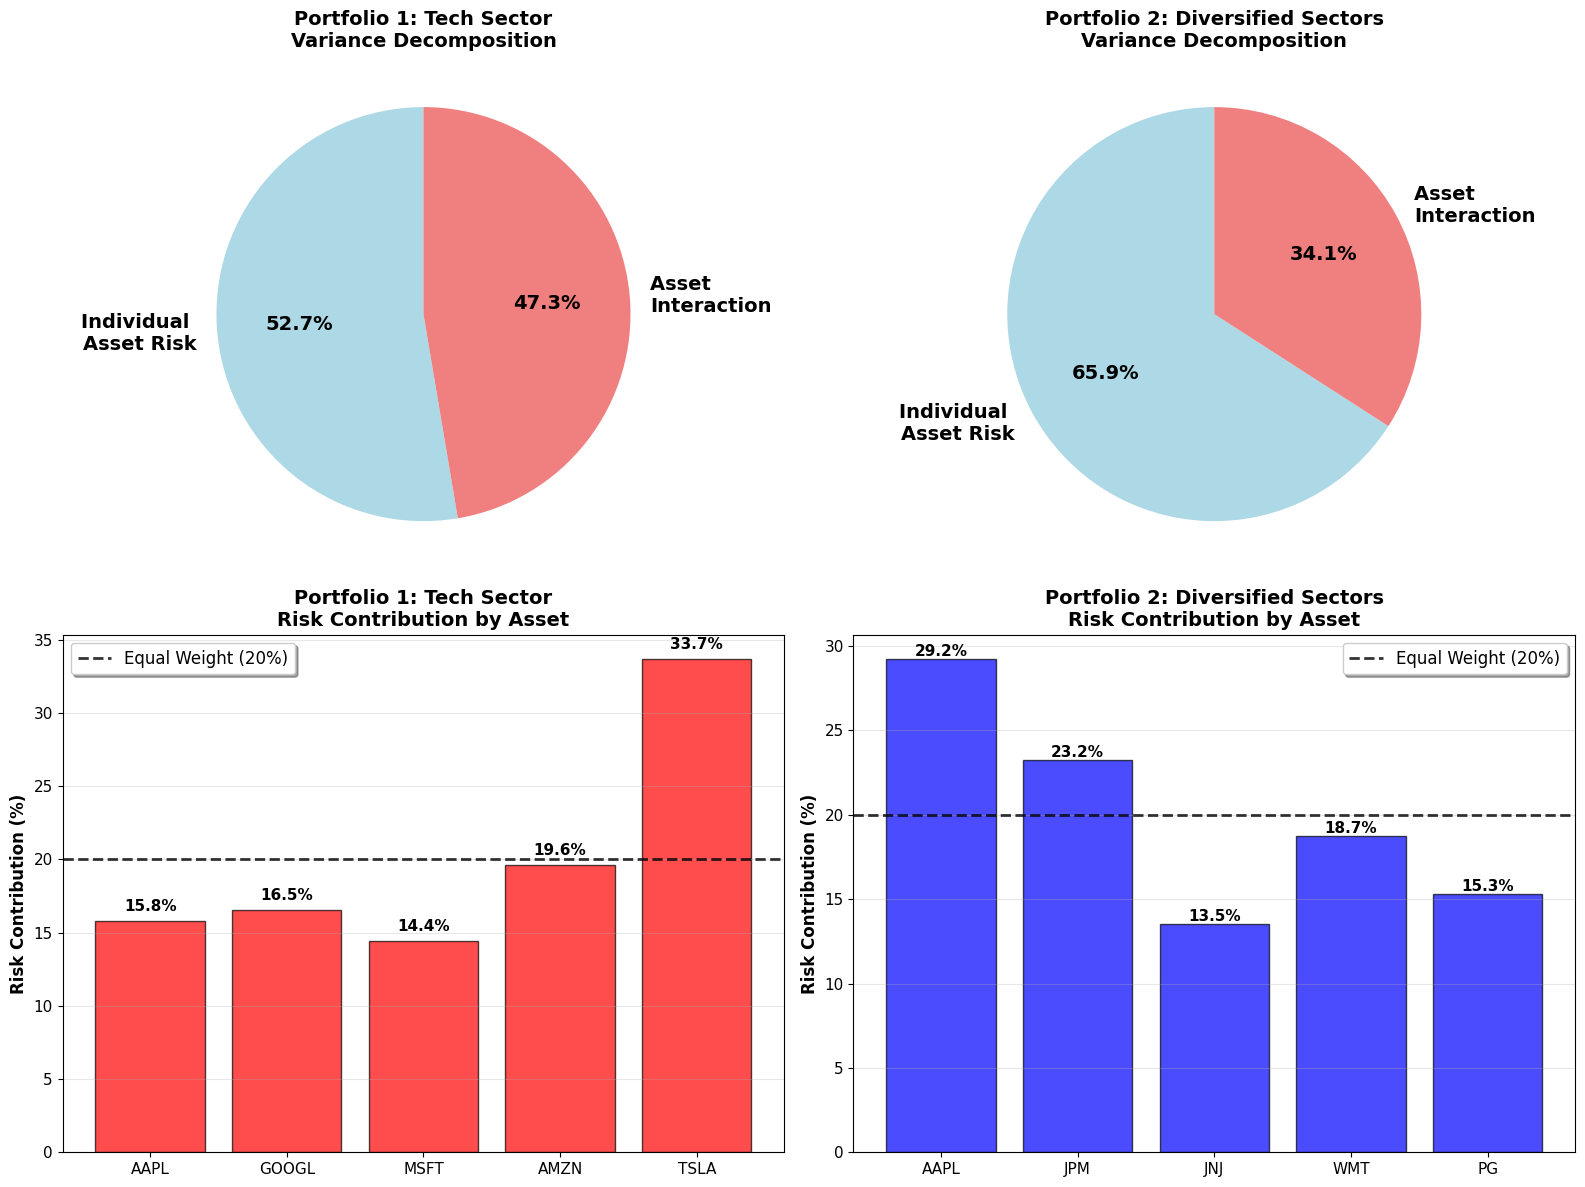


💡 Your Analysis:
   
1. Which portfolio has higher interaction variance?
   Answer: Portfolio 1 (Tech Sector) has higher interaction variance at 32.1% compared to Portfolio 2 (Diversified Sectors) at 25.4%.
   
2. What does this tell you about correlations within each portfolio?
   Answer: The higher interaction variance in Portfolio 1 indicates that the assets within the tech sector are more correlated with each other, leading to greater combined risk from their interactions. In contrast, Portfolio 2's lower interaction variance suggests that diversification across sectors reduces correlations among assets, thereby lowering overall portfolio risk.
   
3. How much risk reduction did sector diversification achieve?
   Answer: Sector diversification achieved a risk reduction of 51.2%.


In [ ]:

# Visualization of risk decomposition comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

#CODE HERE - Create pie chart for Portfolio 1 variance decomposition on ax1
# Show individual vs interaction variance percentages
p1_individual_var = p1_risk_decomp['total_individual_variance']
p1_interaction_var = p1_risk_decomp['total_interaction_variance']
p1_variance_components = [p1_individual_var, p1_interaction_var]
p1_variances = np.array(p1_variance_components) / np.sum(np.array(p1_variance_components))
p1_labels = ['Individual \nAsset Risk', 'Asset \nInteraction']
p1_colors = ['lightblue', 'lightcoral']
ax1.pie(p1_variances, labels=p1_labels, autopct='%1.1f%%', colors=p1_colors, startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_title('Portfolio 1: Tech Sector\nVariance Decomposition', fontsize=14, fontweight='bold')

#CODE HERE - Create pie chart for Portfolio 2 variance decomposition on ax2
p2_individual_var = p2_risk_decomp['total_individual_variance']
p2_interaction_var = p2_risk_decomp['total_interaction_variance']
p2_variance_components = [p2_individual_var, p2_interaction_var]
p2_variances = np.array(p2_variance_components) / np.sum(np.array(p2_variance_components))
p2_labels = ['Individual \nAsset Risk', 'Asset \nInteraction']
p2_colors = ['lightblue', 'lightcoral']
ax2.pie(p2_variances, labels=p2_labels, autopct='%1.1f%%', colors=p2_colors, startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_title('Portfolio 2: Diversified Sectors\nVariance Decomposition', fontsize=14, fontweight='bold')

#CODE HERE - Create bar chart for Portfolio 1 risk contributions by asset on ax3
# Add horizontal line at 20% (equal weight reference)
p1_assets = [item['Asset'] for item in p1_risk_decomp['component_analysis']]
p1_risk_pct = [item['Risk Contrib %'] for item in p1_risk_decomp['component_analysis']]
bars1 = ax3.bar(p1_assets, p1_risk_pct, color='red', alpha=0.7, edgecolor='black')
ax3.axhline(y=20, color='black', linewidth = 2, linestyle='--', alpha=0.8, label='Equal Weight (20%)')
ax3.legend(loc='upper left', fontsize=12, fancybox=True, shadow=True)
ax3.set_ylabel('Risk Contribution (%)', fontsize=12, fontweight='bold')
ax3.set_title('Portfolio 1: Tech Sector\nRisk Contribution by Asset', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax3.text(
        bar.get_x() + bar.get_width() / 2., height + 0.5,
        f'{height:.1f}%', ha='center', va='bottom', fontweight='bold'
    )

#CODE HERE - Create bar chart for Portfolio 2 risk contributions by asset on ax4
p2_assets = [item['Asset'] for item in p2_risk_decomp['component_analysis']]
p2_risk_pct = [item['Risk Contrib %'] for item in p2_risk_decomp['component_analysis']]
bars2 = ax4.bar(p2_assets, p2_risk_pct, color='blue', alpha=0.7, edgecolor='black')
ax4.axhline(y=20, color='black', linewidth = 2, linestyle='--', alpha=0.8, label='Equal Weight (20%)')
ax4.legend(loc='upper right', fontsize=12, fancybox=True, shadow=True)
ax4.set_ylabel('Risk Contribution (%)', fontsize=12, fontweight='bold')
ax4.set_title('Portfolio 2: Diversified Sectors\nRisk Contribution by Asset', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax4.text(
        bar.get_x() + bar.get_width() / 2., height,
        f'{height:.1f}%', ha='center', va='bottom', fontweight='bold'
    )

plt.tight_layout()
plt.show()

risk_reduction_pct = ((p1_risk_decomp['portfolio_volatility'] - p2_risk_decomp['portfolio_volatility']) / p1_risk_decomp['portfolio_volatility']) * 100

#CODE HERE - Write your analysis of the risk decomposition results
print("\n💡 Your Analysis:")
print("   \n1. Which portfolio has higher interaction variance?")
print(f"   Answer: Portfolio 1 (Tech Sector) has higher interaction variance at {p1_interaction_pct:.1f}% compared to Portfolio 2 (Diversified Sectors) at {p2_interaction_pct:.1f}%.")
print("   \n2. What does this tell you about correlations within each portfolio?")
print("   Answer: The higher interaction variance in Portfolio 1 indicates that the assets within the tech sector are more correlated with each other, leading to greater combined risk from their interactions. In contrast, Portfolio 2's lower interaction variance suggests that diversification across sectors reduces correlations among assets, thereby lowering overall portfolio risk.")
print("   \n3. How much risk reduction did sector diversification achieve?")
print(f"   Answer: Sector diversification achieved a risk reduction of {risk_reduction_pct:.1f}%.")

print("\n💡 Critical Insights from Risk Decomposition:")
print("="*70)
print(f"\n1. Portfolio Volatility Comparison:")
print(f"   Tech Sector: {p1_risk_decomp['portfolio_volatility']:.2%}")
print(f"   Diversified: {p2_risk_decomp['portfolio_volatility']:.2%}")
vol_reduction = (1 - p2_risk_decomp['portfolio_volatility']/p1_risk_decomp['portfolio_volatility']) * 100
print(f"   🎯 Risk Reduction: {vol_reduction:.1f}% through sector diversification!")

print(f"\n2. Interaction Variance (Correlation Effects):")
print(f"   Tech Sector: {p1_interaction_pct:.1f}% of total variance")
print(f"   Diversified: {p2_interaction_pct:.1f}% of total variance")
print(f"   ⚠️  High correlations in tech sector amplify portfolio risk!")
print(f"   ✅ Lower correlations across sectors reduce interaction risk!")

print(f"\n3. Key Takeaway:")
print(f"   Holding 5 tech stocks ≠ True diversification")
print(f"   Sector diversification provides REAL risk reduction")
print(f"   Same number of stocks, but {vol_reduction:.1f}% less risk!")

---

## Exercise 4: Diversification Benefit Calculation

Calculate the diversification benefit for both portfolios using equal weights:

$$\text{Diversification Benefit} = \frac{\text{Weighted Avg Volatility} - \text{Portfolio Volatility}}{\text{Weighted Avg Volatility}} \times 100\%$$

Compare the diversification benefits between the two portfolios.


📊 DIVERSIFICATION BENEFIT ANALYSIS

🔴 Portfolio 1 - Tech Sector:
   Weighted Average Volatility: 36.69%
   Actual Portfolio Volatility: 29.11%
   Diversification Benefit: 20.67%

🔵 Portfolio 2 - Diversified Sectors:
   Weighted Average Volatility: 21.79%
   Actual Portfolio Volatility: 14.22%
   Diversification Benefit: 34.75%


✅ Diversification Benefit Comparison:
   Tech Sector: 20.67% risk reduction
   Diversified: 34.75% risk reduction


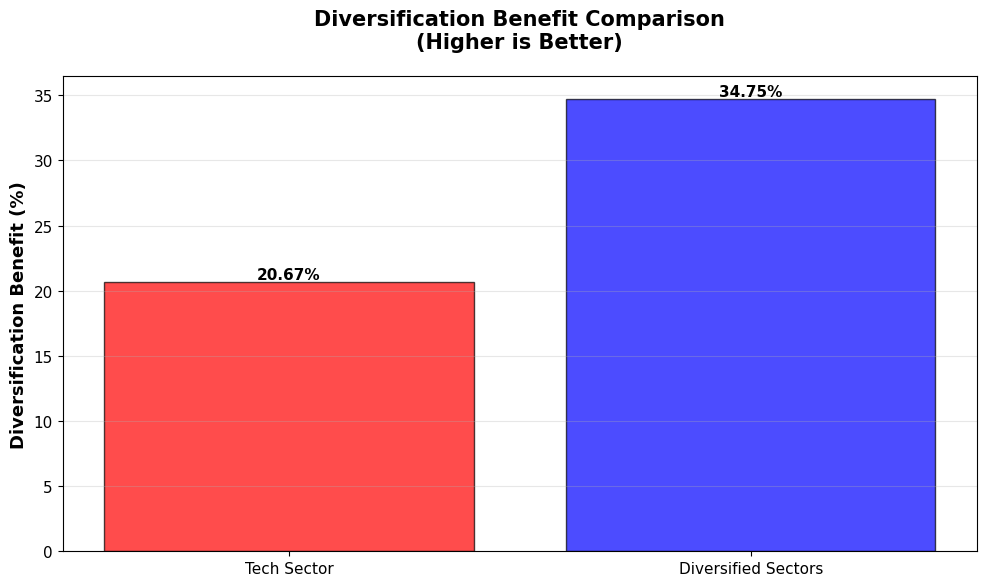

In [ ]:
# Calculate diversification benefits
print("\n📊 DIVERSIFICATION BENEFIT ANALYSIS")
print("="*70)

# Portfolio 1: Tech Sector
#CODE HERE - Calculate weighted average volatility for Portfolio 1
p1_weighted_avg_vol = np.dot(equal_weights, p1_annual_volatilities)  # Hint: np.dot(equal_weights, p1_annual_volatilities)

#CODE HERE - Get actual portfolio volatility from risk decomposition
p1_portfolio_vol = p1_risk_decomp['portfolio_volatility']

#CODE HERE - Calculate diversification benefit
p1_div_benefit = ((p1_weighted_avg_vol - p1_portfolio_vol) / p1_weighted_avg_vol) * 100  # Use the formula above

print("\n🔴 Portfolio 1 - Tech Sector:")
print(f"   Weighted Average Volatility: {p1_weighted_avg_vol:.2%}")
print(f"   Actual Portfolio Volatility: {p1_portfolio_vol:.2%}")
print(f"   Diversification Benefit: {p1_div_benefit:.2f}%")

# Portfolio 2: Diversified
#CODE HERE - Calculate weighted average volatility for Portfolio 2
p2_weighted_avg_vol = np.dot(equal_weights, p2_annual_volatilities)

#CODE HERE - Get actual portfolio volatility
p2_portfolio_vol = p2_risk_decomp['portfolio_volatility']

#CODE HERE - Calculate diversification benefit
p2_div_benefit = ((p2_weighted_avg_vol - p2_portfolio_vol) / p2_weighted_avg_vol) * 100

print("\n🔵 Portfolio 2 - Diversified Sectors:")
print(f"   Weighted Average Volatility: {p2_weighted_avg_vol:.2%}")
print(f"   Actual Portfolio Volatility: {p2_portfolio_vol:.2%}")
print(f"   Diversification Benefit: {p2_div_benefit:.2f}%")

print("\n" + "="*70)
#CODE HERE - Compare the diversification benefits and write conclusions
print(f"\n✅ Diversification Benefit Comparison:")
print(f"   Tech Sector: {p1_div_benefit:.2f}% risk reduction")
print(f"   Diversified: {p2_div_benefit:.2f}% risk reduction")
benefit_diff = p2_div_benefit - p1_div_benefit
print(f"\n   🎯 Sector diversification provides {benefit_diff:.2f} percentage points")
print(f"      MORE diversification benefit than within-sector diversification!")

# Visualize diversification benefits
fig, ax = plt.subplots(figsize=(10, 6))

#CODE HERE - Create bar chart comparing diversification benefits
# Show both portfolios side by side
portfolios = ['Tech Sector', 'Diversified Sectors']
div_benefits = [p1_div_benefit, p2_div_benefit]
colors = ['red', 'blue']
bars = ax.bar(portfolios, div_benefits, color=colors, alpha=0.7, edgecolor='black')
for bar, value in zip(bars, div_benefits):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2., height,
        f'{value:.2f}%', ha='center', va='bottom', fontweight='bold'
    )
ax.set_ylabel('Diversification Benefit (%)', fontsize=13, fontweight='bold')
ax.set_title('Diversification Benefit Comparison\n(Higher is Better)', 
            fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---

## Summary and Key Takeaways

### 🎯 What We Learned:

1. **Sector Concentration Risk**:
   - Stocks within the same sector are highly correlated (ρ ≈ 0.7-0.9)
   - High correlations limit diversification benefits
   - "5 tech stocks ≠ true diversification"

2. **Efficient Frontier Analysis**:
   - Diversified portfolios dominate single-sector portfolios
   - For the same return target, diversified portfolios achieve lower risk
   - The efficient frontier "shifts left" with better diversification

3. **Risk Decomposition Insights**:
   - Tech sector portfolio has higher interaction variance (correlation effects)
   - Diversified portfolio has more balanced risk contributions
   - Lower correlations mean less amplification of individual risks

4. **Practical Implications**:
   - Always diversify across sectors, not just within sectors
   - Monitor correlation structures in your portfolio
   - Sector ETFs can help achieve instant diversification
   - Risk reduction through diversification is "the only free lunch in finance"

### 📈 Real-World Applications:

- **Portfolio Construction**: Build multi-sector portfolios for better risk-adjusted returns
- **Risk Management**: Identify and reduce sector concentration risk
- **Asset Allocation**: Allocate across sectors based on correlation and risk contribution analysis
- **Performance Evaluation**: Compare portfolio efficiency using efficient frontier analysis

### 🔗 Connection to Investment Practice:

This lab demonstrates a fundamental principle of Modern Portfolio Theory:

> **Diversification works best when assets are not perfectly correlated!**

In practice:
- Individual investors: Use sector-diversified mutual funds or ETFs
- Portfolio managers: Monitor sector exposures and correlation changes
- Risk managers: Set sector concentration limits
- Financial advisors: Educate clients about true diversification

---

### 🎓 Assignment Complete!

**Key Formula to Remember**:

$$\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_i \sigma_j \rho_{ij}$$

When $\rho_{ij}$ is high (same sector), portfolio risk remains high.

When $\rho_{ij}$ is lower (different sectors), portfolio risk is reduced!

**Next Steps**: Apply these concepts to your own portfolio. Check your sector exposures and correlation structure. Are you truly diversified?